<a href="https://colab.research.google.com/github/gustavocmiranda/DS_Projects/blob/main/CBLOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns


from bs4 import BeautifulSoup
from urllib.request import urlopen

from urllib.request import Request
hdr = {'User-Agent': 'Mozilla/5.0'}

In [2]:
all_games_data = pd.DataFrame()
url = 'https://gol.gg/tournament/tournament-matchlist/CBLOL%20Split%201%202024/'

soup = BeautifulSoup(urlopen(url), 'lxml')

html_tables = pd.read_html(str(soup), header= 0)
df = html_tables[0]
df.rename(columns={'Unnamed: 1': 'Team 1', 'Unnamed: 3':'Team 2', 'Unnamed: 4': 'WEEK'}, inplace=True)

filtered_links = soup.find_all('a', href=lambda href: 'page-game' in href or 'page-preview' in href)
hs = []
for link in filtered_links:
  href = link.get('href').replace('..', '')
  hs.append(href)

df['href'] = pd.Series(hs)
df = df.dropna().reset_index().drop('index', axis=1)

for index, row in df.iterrows():
  href = row['href'].replace('-game', '-fullstats')
  team1 = row['Team 1']
  team2 = row['Team 2']
  week = row['WEEK'].replace('WEEK', '')
  url = f'https://gol.gg{href}'

  req = Request(url,headers=hdr)
  page = urlopen(req)
  table_soup = BeautifulSoup(page, 'lxml')
  html_tables = pd.read_html(str(table_soup), index_col=0, header= 0)
  temp = html_tables[0]
  temp = temp.transpose().reset_index()

  table = table_soup.find_all('table')[0]
  images = table.findAll('img')
  champions = []
  for image in images:
    champions.append(image.get('alt'))
  champions = pd.Series(champions)
  temp['index'] = champions
  temp['Team'] = np.where(temp.index < 5, team1, team2)
  temp['Side'] = np.where(temp.index < 5, 'Blue', 'Red')
  temp['Week'] = week
  temp.rename(columns={'index':'Champion'}, inplace=True)
  temp.drop('CS in Enemy Jungle', axis=1, inplace=True)


  all_games_data = pd.concat([all_games_data, temp], axis=0, ignore_index=True)

all_games_data['Solo kills'].fillna('0', inplace=True)
all_games_data[['Level', 'Kills', 'Deaths', 'Assists','CS', "CS in Team's Jungle", 'CSM', 'Golds', 'GPM', 'Vision Score', 'Wards placed', 'Wards destroyed',
       'Control Wards Purchased', 'Detector Wards Placed', 'VSPM', 'WPM', 'VWPM', 'WCPM', 'Total damage to Champion', 'Physical Damage',
       'Magic Damage', 'True Damage', 'DPM', 'K+A Per Minute', 'Solo kills', 'Double kills', 'Triple kills', 'Quadra kills',
       'Penta kills', 'GD@15', 'CSD@15', 'XPD@15', 'LVLD@15',
       'Objectives Stolen', 'Damage dealt to turrets',
       'Damage dealt to buildings', 'Total heal', 'Total Heals On Teammates',
       'Damage self mitigated', 'Total Damage Shielded On Teammates',
       'Time ccing others', 'Total Time CC Dealt', 'Total damage taken',
       'Total Time Spent Dead', 'Consumables purchased', 'Items Purchased',
       'Shutdown bounty collected', 'Shutdown bounty lost', 'Week']] = all_games_data[['Level', 'Kills', 'Deaths', 'Assists','CS', "CS in Team's Jungle", 'CSM', 'Golds', 'GPM', 'Vision Score', 'Wards placed', 'Wards destroyed',
       'Control Wards Purchased', 'Detector Wards Placed', 'VSPM', 'WPM', 'VWPM', 'WCPM', 'Total damage to Champion', 'Physical Damage',
       'Magic Damage', 'True Damage', 'DPM', 'K+A Per Minute', 'Solo kills', 'Double kills', 'Triple kills', 'Quadra kills',
       'Penta kills', 'GD@15', 'CSD@15', 'XPD@15', 'LVLD@15',
       'Objectives Stolen', 'Damage dealt to turrets',
       'Damage dealt to buildings', 'Total heal', 'Total Heals On Teammates',
       'Damage self mitigated', 'Total Damage Shielded On Teammates',
       'Time ccing others', 'Total Time CC Dealt', 'Total damage taken',
       'Total Time Spent Dead', 'Consumables purchased', 'Items Purchased',
       'Shutdown bounty collected', 'Shutdown bounty lost', 'Week']].astype('float')
all_games_data['KDA'] = np.where(all_games_data['KDA'] == 'Perfect KDA', all_games_data['Kills']+all_games_data['Assists'], all_games_data['KDA'])
all_games_data['KDA'] = all_games_data['KDA'].astype('float')

In [3]:
all_games_data

,Champion,Player,Role,Level,Kills,Deaths,Assists,KDA,CS,CS in Team's Jungle,...,Total Time CC Dealt,Total damage taken,Total Time Spent Dead,Consumables purchased,Items Purchased,Shutdown bounty collected,Shutdown bounty lost,Team,Side,Week
0,Aatrox,Wizer,TOP,18.0,9.0,3.0,7.0,5.3,332.0,42.0,...,312.0,45929.0,155.0,11.0,30.0,1450.0,900.0,paiN Gaming,Blue,9.0
1,Rell,Cariok,JUNGLE,17.0,0.0,6.0,19.0,3.2,187.0,171.0,...,1037.0,30110.0,230.0,17.0,33.0,0.0,0.0,paiN Gaming,Blue,9.0
2,Ahri,dyNquedo,MID,18.0,7.0,5.0,9.0,3.2,338.0,4.0,...,98.0,23208.0,238.0,22.0,43.0,350.0,650.0,paiN Gaming,Blue,9.0
3,Kalista,Titan,ADC,18.0,6.0,5.0,12.0,3.6,374.0,34.0,...,517.0,24370.0,195.0,10.0,34.0,150.0,400.0,paiN Gaming,Blue,9.0
4,Neeko,Kuri,SUPPORT,16.0,3.0,4.0,14.0,4.3,78.0,1.0,...,238.0,19508.0,178.0,21.0,39.0,200.0,100.0,paiN Gaming,Blue,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Gwen,Lonely,TOP,15.0,1.0,4.0,2.0,0.8,248.0,4.0,...,58.0,21346.0,80.0,10.0,23.0,0.0,0.0,KaBuM! e-Sports,Red,1.0
896,Amumu,Malrang,JUNGLE,12.0,0.0,4.0,3.0,0.8,142.0,129.0,...,489.0,20966.0,94.0,9.0,25.0,0.0,0.0,KaBuM! e-Sports,Red,1.0
897,Tristana,Hauz,MID,15.0,1.0,4.0,1.0,0.5,261.0,12.0,...,94.0,15257.0,100.0,5.0,19.0,0.0,50.0,KaBuM! e-Sports,Red,1.0
898,Draven,Netuno,ADC,13.0,1.0,2.0,2.0,1.5,259.0,0.0,...,71.0,11322.0,53.0,6.0,24.0,0.0,0.0,KaBuM! e-Sports,Red,1.0


In [34]:
top5_solos = all_games_data.groupby(['Player','Role'])['Solo kills'].sum().sort_values(ascending=False).head(3)
top5_solos = [name for name, role in top5_solos.index]
top5_solos

['Guigo', 'Makes', 'Lonely']

In [13]:
all_games_data.groupby(['Player','Role'])['Solo kills'].mean().sort_values(ascending=False).head()

Player  Role
Guigo   TOP     0.722222
Makes   TOP     0.722222
Lonely  TOP     0.500000
fNb     TOP     0.444444
Robo    TOP     0.444444
Name: Solo kills, dtype: float64

In [14]:
all_games_data[['Player', 'Solo kills']].sort_values(by='Solo kills', ascending=False)

,Player,Solo kills
70,Lonely,6.0
720,Makes,5.0
600,Guigo,3.0
103,NinjaKiwi,2.0
165,SuperCleber,2.0
...,...,...
895,Lonely,0.0
896,Malrang,0.0
897,Hauz,0.0
898,Netuno,0.0


In [52]:
def plot_solo_kills(players):
    sns.set_context('notebook')
    fig, ax = plt.subplots()
    for player in players:
        sns.lineplot(all_games_data[all_games_data['Player'] == player][['Player', 'Solo kills', 'Week']], 
                     x='Week', y='Solo kills', errorbar=None, markers=True)
    
    sns.despine()
    plt.legend(players)
    plt.show()

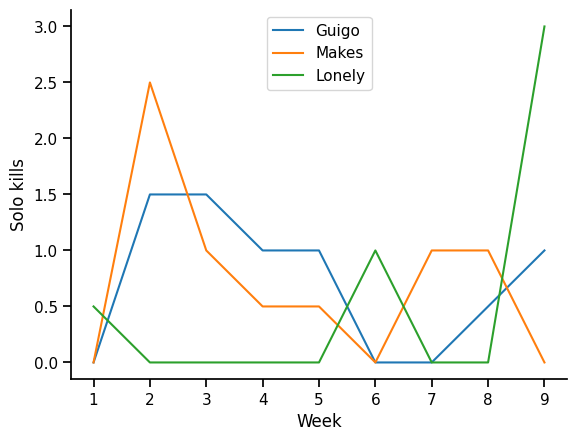

In [53]:
plot_solo_kills(top5_solos)

In [38]:
no_senna = all_games_data.loc[all_games_data['Champion'] != 'Senna']

In [39]:
data= no_senna.loc[no_senna['Role'].isin(['ADC', 'MID', 'TOP'])].groupby(['Player', 'Role'])[['CSM', 'DPM']].mean().reset_index()

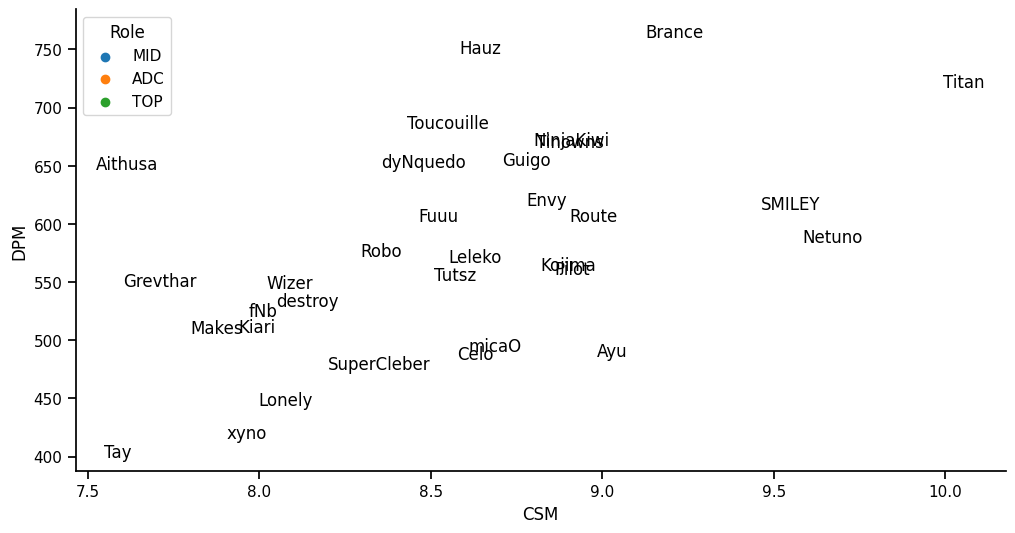

In [78]:
plt.figure(figsize=(12,6))
sns.scatterplot(data, x='CSM', y='DPM', hue= 'Role', alpha=0)
for index,row in data.iterrows():
    plt.text(row['CSM'], row['DPM'], s=row['Player'], ha='center', va='center_baseline', )
sns.despine()
plt.show()